# Etudes des valeurs foncières Française
### Liens: https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/

Framework: Scikit Learn

In [2]:
import numpy as np
import pandas as pd

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

#### Chargement du fichiers des valeurs foncières de 2018

In [3]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y') # 03/01/2018
df = pd.read_csv('valeursfoncieres-2018.txt', sep='|', decimal=",", parse_dates=['Date mutation'], date_parser=dateparse)

/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (18,23,24,26,28,32,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Renomme les colonnes

In [4]:
import unidecode

columns = {}
for index, column_name in enumerate(df.columns):
    columns[column_name] = unidecode.unidecode(column_name.replace(' ','_').replace('\'','_').lower())
df.rename(columns=columns, inplace=True)

## Nettoyage des données simple

#### Analyse des données manquantes

In [5]:
def missing_values_assessment(df):
    nan_values = df.isnull().sum().sum()
    print('Nombre d\'observations: {:,}'.format(len(df)))
    print('Nombre de valeurs: {:,}'.format(df.size))
    print('Valeurs manquantes: {:,}'.format(nan_values))
    print('Qualité des données: {}%'.format(100-round((nan_values/df.size)*100,2)))
    print('Type de données:\n {}%'.format(df.dtypes.value_counts()))
    analysis = {'Manquant': df.isnull().sum(),
                'Manquant %':round((df.isnull().sum()/len(df))*100, 2),
                'Type':df.dtypes
               }
    return pd.DataFrame(analysis)

In [6]:
missing_values_assessment(df).sort_values('Manquant %', ascending=False)

Nombre d'observations: 3,059,537
Nombre de valeurs: 131,560,091
Valeurs manquantes: 75,853,849
Qualité des données: 42.34%
Type de données:
 float64           22
object            16
int64              4
datetime64[ns]     1
dtype: int64%


,Manquant,Manquant %,Type
code_service_ch,3059537,100.00,float64
4_articles_cgi,3059537,100.00,float64
reference_document,3059537,100.00,float64
5_articles_cgi,3059537,100.00,float64
identifiant_local,3059537,100.00,float64
3_articles_cgi,3059537,100.00,float64
2_articles_cgi,3059537,100.00,float64
1_articles_cgi,3059537,100.00,float64
surface_carrez_du_5eme_lot,3058845,99.98,float64
surface_carrez_du_4eme_lot,3057858,99.95,float64


#### Supression des colonnes sans données

In [7]:
# Drop NaN columns
orig_col = df.columns
df.dropna(how='all', axis=1, inplace=True)
print("Suppression de {} colonnes sans données:".format(len(orig_col)-len(df.columns)))
print([item for item in orig_col if item not in df.columns])

Suppression de 8 colonnes sans données:
['code_service_ch', 'reference_document', '1_articles_cgi', '2_articles_cgi', '3_articles_cgi', '4_articles_cgi', '5_articles_cgi', 'identifiant_local']


#### Suppression des lignes en double

In [8]:
df[df.duplicated(keep=False)]

,no_disposition,date_mutation,nature_mutation,valeur_fonciere,no_voie,b/t/q,type_de_voie,code_voie,voie,code_postal,...,5eme_lot,surface_carrez_du_5eme_lot,nombre_de_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,nature_culture,nature_culture_speciale,surface_terrain
212,1,2018-01-11,Vente,160000.0,3.0,NaN,PL,0082,DE LA RESISTANCE,1340.0,...,NaN,NaN,0,3.0,Dépendance,0.0,0.0,S,NaN,238.0
213,1,2018-01-11,Vente,160000.0,3.0,NaN,PL,0082,DE LA RESISTANCE,1340.0,...,NaN,NaN,0,3.0,Dépendance,0.0,0.0,S,NaN,238.0
287,1,2018-01-15,Vente,15000.0,5246.0,B,NaN,B050,COLIGNY LE HAUT,1270.0,...,NaN,NaN,0,3.0,Dépendance,0.0,0.0,S,NaN,92.0
288,1,2018-01-15,Vente,15000.0,5246.0,B,NaN,B050,COLIGNY LE HAUT,1270.0,...,NaN,NaN,0,3.0,Dépendance,0.0,0.0,S,NaN,92.0
318,1,2018-01-16,Vente,138000.0,18.0,NaN,RUE,0140,DOC SCHWEITZER,1000.0,...,NaN,NaN,0,2.0,Appartement,64.0,3.0,S,NaN,666.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059456,1,2018-12-21,Vente,33000000.0,11.0,NaN,PL,9917,DES VOSGES,75004.0,...,NaN,NaN,0,4.0,Local industriel. commercial ou assimilé,73.0,0.0,S,NaN,761.0
3059463,1,2018-12-21,Vente,33000000.0,11.0,NaN,PL,9917,DES VOSGES,75004.0,...,NaN,NaN,0,2.0,Appartement,40.0,2.0,S,NaN,761.0
3059464,1,2018-12-21,Vente,33000000.0,11.0,NaN,PL,9917,DES VOSGES,75004.0,...,NaN,NaN,0,2.0,Appartement,45.0,2.0,S,NaN,761.0
3059466,1,2018-12-21,Vente,33000000.0,11.0,NaN,PL,9917,DES VOSGES,75004.0,...,NaN,NaN,0,4.0,Local industriel. commercial ou assimilé,73.0,0.0,S,NaN,761.0


In [9]:
# Drop duplicates
initial_length = len(df)
df.drop_duplicates(inplace=True)
print("Suppression des doublons: {}".format(initial_length-len(df)))

Suppression des doublons: 108687


###  Analyse des colonnes

#### No Disposition

In [10]:
df.no_disposition.dtype

dtype('int64')

In [11]:
def describe(df, col):
    return df[col].describe().apply(lambda x: format(x, 'f'))

In [12]:
describe(df,'no_disposition')

count    2950850.000000
mean           1.230464
std            5.275825
min            1.000000
25%            1.000000
50%            1.000000
75%            1.000000
max          362.000000
Name: no_disposition, dtype: object

#### Frequency count

In [20]:
df.no_disposition.value_counts(dropna=False).head(20)

1     2768841
2      150004
3       21276
4        3986
5        1172
6         569
7         299
8         286
9         142
12        123
15        103
10        102
11         97
53         88
18         77
13         73
14         62
32         61
17         61
60         60
Name: no_disposition, dtype: int64

In [13]:
df.no_disposition.unique()

array([  1,   2,   3,   4,   5,   6,   7,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,   8,   9,  34,  35,  36,  37,  38,  47,
        48,  50,  52,  53,  54,  55,  56,  57,  61,  62,  63,  65,  66,
        67,  68,  75,  76,  81,  82,  88,  90,  91,  92,  93,  94,  97,
       101, 102, 104, 105, 107, 108, 110, 111, 112, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 128, 129, 130, 131, 132, 133, 134,
       135, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 154, 155, 156, 157, 159, 161, 165, 166, 167, 168, 169,
       170, 171, 173, 174, 175, 176, 177, 178, 179, 181, 182, 183, 184,
       185, 186, 187, 188, 190, 191, 192, 193, 194, 195, 197, 198, 199,
       201, 203, 205, 207, 208, 209, 210, 211, 214, 217, 218, 219, 222,
       224, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237,
       238, 239, 240, 241, 242, 243, 245, 246, 247, 248, 249, 25

In [103]:
df.no_disposition.isnull().sum()

0

Text(0.5, 1.0, "Distribution de l'attribut 'N° de disposition'")

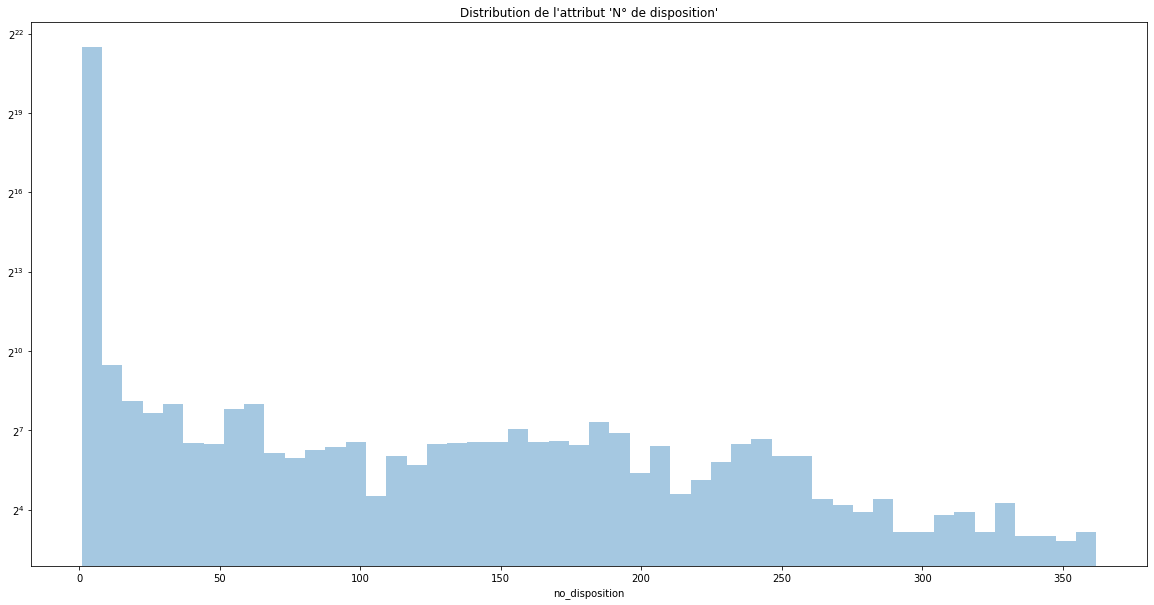

In [68]:
plt.figure(figsize=(20,10))
ax = sns.distplot(df.no_disposition, kde=False)
ax.set_yscale('log', basey=2)
ax.set_title('Distribution de l\'attribut \'N° de disposition\'')

In [65]:
df.no_disposition.corr(df.valeur_fonciere)

-0.001720706274379892

Text(0, 0.5, 'Valeur foncière')

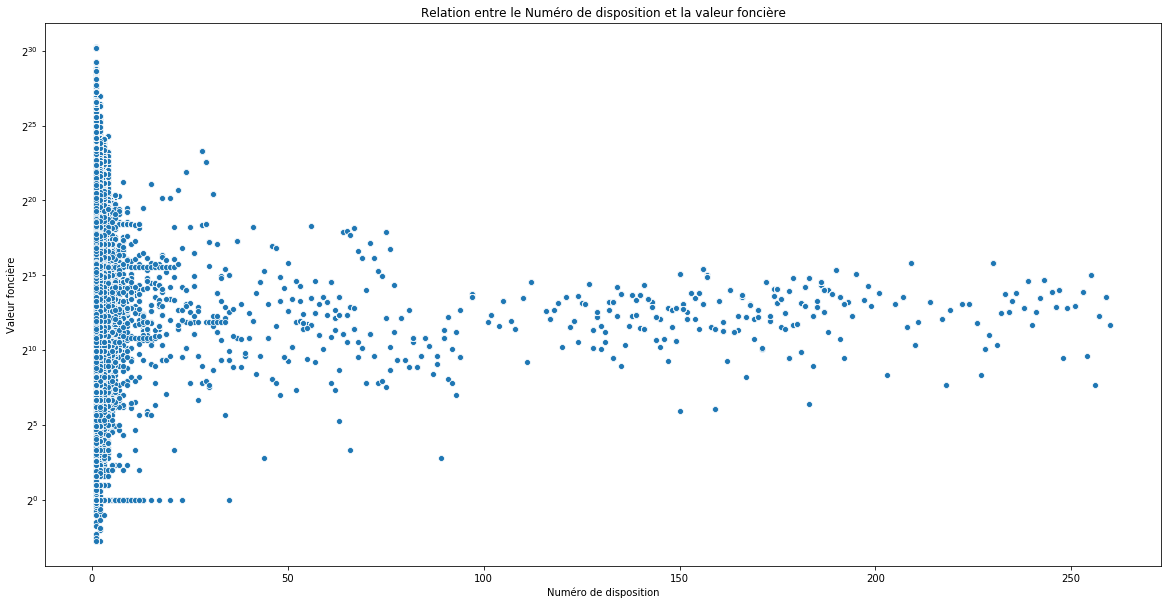

In [73]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x=df.no_disposition, y=df.valeur_fonciere)
ax.set_yscale('log', basey=2)
ax.set_title('Relation entre le numéro de disposition et la valeur foncière')
ax.set_xlabel('Numéro de disposition')
ax.set_ylabel('Valeur foncière')

#### Date de mutation

In [74]:
df.date_mutation.dtype

dtype('<M8[ns]')

Text(0, 0.5, 'Nombre de mutation')

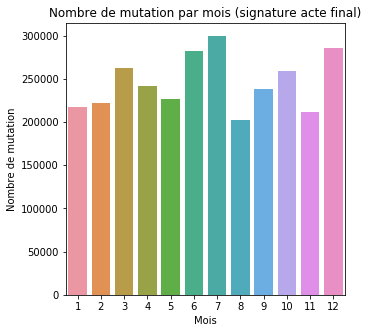

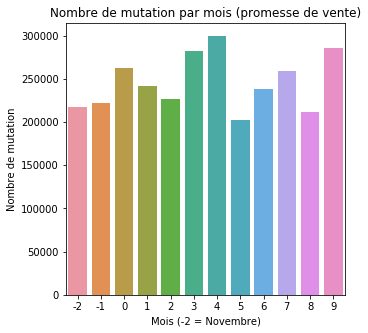

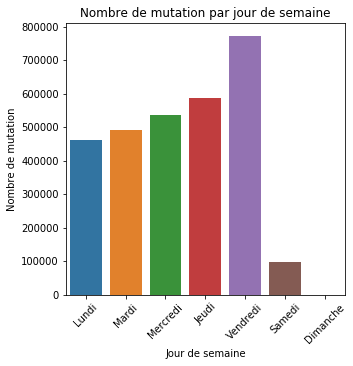

In [27]:
plt.figure(figsize=(5,5))
df['month'] = df.date_mutation.map(lambda x: x.month)
ax = sns.countplot(x=df.month)
ax.set_title('Nombre de mutation par mois (signature acte final)')
ax.set_xlabel('Mois')
ax.set_ylabel('Nombre de mutation')

plt.figure(figsize=(5,5))
df['sign_month'] = df.date_mutation.map(lambda x: x.month-3)
ax = sns.countplot(x=df.sign_month)
ax.set_title('Nombre de mutation par mois (promesse de vente)')
ax.set_xlabel('Mois (-2 = Novembre)')
ax.set_ylabel('Nombre de mutation')

plt.figure(figsize=(5,5))
df['dayofweek'] = df.date_mutation.map(lambda x: x.dayofweek)
ax = sns.countplot(x=df.dayofweek)
ax.set_title('Nombre de mutation par jour de semaine')
ax.set_xlabel('Jour de semaine')
ax.set_xticklabels(['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche'],rotation=45)
ax.set_ylabel('Nombre de mutation')

Nombre de signature signée le dimanche:

In [96]:
len(df[df['dayofweek']==6])

927

#### Nature de mutation

In [111]:
df.nature_mutation.dtype

dtype('O')

In [112]:
df.nature_mutation.unique()

array(['Vente', "Vente en l'état futur d'achèvement", 'Echange',
       'Vente terrain à bâtir', 'Adjudication', 'Expropriation'],
      dtype=object)

In [28]:
df.nature_mutation.value_counts()

Vente                                 2649843
Vente en l'état futur d'achèvement     236054
Echange                                 41697
Vente terrain à bâtir                   12253
Adjudication                             9437
Expropriation                            1566
Name: nature_mutation, dtype: int64

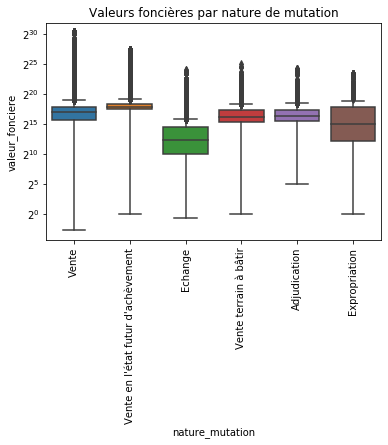

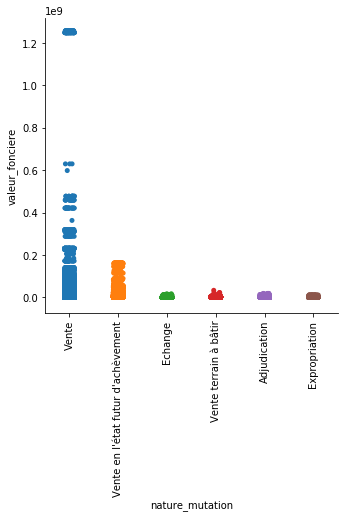

In [154]:
ax = sns.boxplot(x="nature_mutation", y="valeur_fonciere", data=df);
ax.set_yscale('log', basey=2)
ax.set_xticklabels(labels=df.nature_mutation.unique(), rotation=90)
ax.set_title('Valeurs foncières par nature de mutation')

ax = sns.catplot(x="nature_mutation", y="valeur_fonciere", data=df);
ax.set_xticklabels(rotation=90)

##### Etude des expropriations

In [159]:
df_ex = df[df['nature_mutation']=='Expropriation'].sort_values(by='valeur_fonciere', ascending=False)
df_ex.head(1)

,no_disposition,date_mutation,nature_mutation,valeur_fonciere,no_voie,b/t/q,type_de_voie,code_voie,voie,code_postal,commune,code_departement,code_commune,prefixe_de_section,section,no_plan,no_volume,1er_lot,surface_carrez_du_1er_lot,2eme_lot,surface_carrez_du_2eme_lot,3eme_lot,surface_carrez_du_3eme_lot,4eme_lot,surface_carrez_du_4eme_lot,5eme_lot,surface_carrez_du_5eme_lot,nombre_de_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,nature_culture,nature_culture_speciale,surface_terrain,month,sign_month,dayofweek
23907,28,2018-09-12,Expropriation,10455340.0,NaN,NaN,NaN,B014,TRES LA GRANGE,1210.0,FERNEY-VOLTAIRE,1,160,NaN,A,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T,NaN,7407.0,9,6,2


L'expropriation la plus chère est à - code postal 01210 - Ferney-Voltaire dans l'Ain. Une ville à la frontière de la Suisse, avec l'aéroport Genevois à quelques centaines de mètres.

In [149]:
df_ex.commune.value_counts().head()

VIEVILLE            718
FERNEY-VOLTAIRE     106
MASSY               100
CACHAN               44
CLICHY SOUS BOIS     40
Name: commune, dtype: int64

Text(0.5, 1.0, "Nombre d'expropriation par ville")

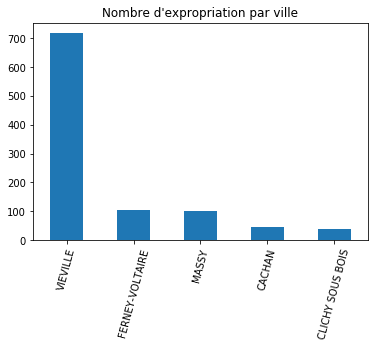

In [151]:
ax = df_ex.commune.value_counts().head().plot.bar(rot=75)
ax.set_title('Nombre d\'expropriation par ville')

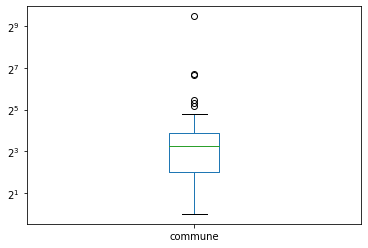

In [135]:
ax = df_ex.commune.value_counts().plot.box()
ax.set_yscale('log', basey=2)

Toutefois, la ville de Vieville - code postal 52310 - a enregistré le plus grand nombre d'expropriation en 2018.

##### Etude des ventes

In [158]:
pd.options.display.max_columns = None
df_ve = df[df['nature_mutation']=='Vente'].sort_values(by='valeur_fonciere', ascending=False)
df_ve.head(1)

,no_disposition,date_mutation,nature_mutation,valeur_fonciere,no_voie,b/t/q,type_de_voie,code_voie,voie,code_postal,commune,code_departement,code_commune,prefixe_de_section,section,no_plan,no_volume,1er_lot,surface_carrez_du_1er_lot,2eme_lot,surface_carrez_du_2eme_lot,3eme_lot,surface_carrez_du_3eme_lot,4eme_lot,surface_carrez_du_4eme_lot,5eme_lot,surface_carrez_du_5eme_lot,nombre_de_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,nature_culture,nature_culture_speciale,surface_terrain,month,sign_month,dayofweek
2826340,1,2018-09-18,Vente,1.256966e+09,44.0,NaN,AV,7121,DE PARIS,92320.0,CHATILLON,92,20,NaN,I,250,NaN,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN,9,6,1


La vente la plus chère a été réalisé dans la commune de Châtillon - code postal 92320 - pour un montant de 1.256.966.000€ au 44 avenue de Paris.
La ville de Chatillon a réalisé plusieurs transactions du même montant, le même jour. Cela semble plus être la vente d'un lot d'immeuble entre plusieurs organisations.

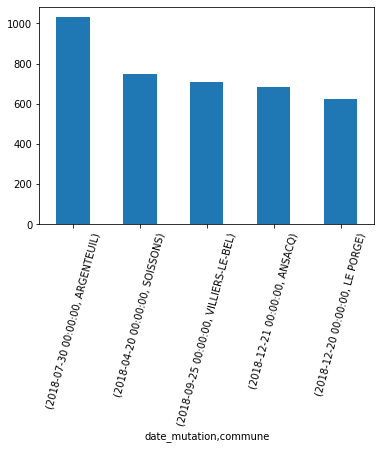

In [130]:
df_vente_par_jour = df[df['nature_mutation']=='Vente'].groupby(['date_mutation','commune'])['commune'].count().sort_values(ascending=False)
#df_vente_par_jour[0:5]
df_vente_par_jour[0:5].head(10).plot.bar(x='Commune', rot=75)

La ville d'Argenteuil est la commune qui a enregistré le plus de vente le même jour: 1030 ventes le 30 Juillet 2018. Suivi par la commune de Soissons avec 749 ventes le 20 Avril 2018.

In [120]:
hab_argenteuil = 11210 # source Wikipedia
print("Vente par habitant à {} le {}: {}".format(df_vente_par_jour.index[0][1],df_vente_par_jour.index[0][0],round(hab_argenteuil/df_vente_par_jour[0],2)))
hab_soissons = 28530 # source Wikipedia
print("Vente par habitant à {} le {}: {}".format(df_vente_par_jour.index[1][1],df_vente_par_jour.index[1][0], round(hab_soissons/df_vente_par_jour[1],2)))

Vente par habitant à ARGENTEUIL le 2018-07-30 00:00:00: 10.88
Vente par habitant à SOISSONS le 2018-04-20 00:00:00: 38.09


Text(0.5, 1.0, 'Nombre de vente par ville')

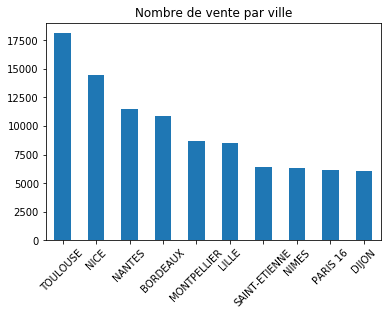

In [153]:
se_vente_commune = df_ve.commune.value_counts()
ax = se_vente_commune.head(10).plot.bar(x='Commune', rot=45)
ax.set_title('Nombre de vente par ville')

La ville de Toulouse a enregistré le plus grand nombre de vente en 2018, suivi par Nice et Nantes.

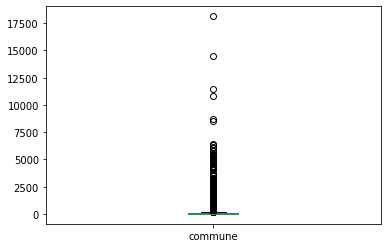

In [132]:
se_vente_commune.plot.box()

##### Etude des vente en l'état futur d'achèvement

In [161]:
df_vefa = df[df['nature_mutation']=='Vente en l\'état futur d\'achèvement'].sort_values(by='valeur_fonciere', ascending=False)
df_vefa.head(1)

,no_disposition,date_mutation,nature_mutation,valeur_fonciere,no_voie,b/t/q,type_de_voie,code_voie,voie,code_postal,commune,code_departement,code_commune,prefixe_de_section,section,no_plan,no_volume,1er_lot,surface_carrez_du_1er_lot,2eme_lot,surface_carrez_du_2eme_lot,3eme_lot,surface_carrez_du_3eme_lot,4eme_lot,surface_carrez_du_4eme_lot,5eme_lot,surface_carrez_du_5eme_lot,nombre_de_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,nature_culture,nature_culture_speciale,surface_terrain,month,sign_month,dayofweek
3058426,1,2018-08-01,Vente en l'état futur d'achèvement,161633440.0,6.0,NaN,RUE,0092,AGRIPPA D AUBIGNE,75004.0,PARIS 04,75,104,NaN,AT,23,3001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,5,2


La vente en l'état futur d'achèvement la plus chère est de 161.633.440€ réalisée le 1er Août 2018. L'adresse correspond à la mairie du 4éme arrondissement de Paris.

Text(0.5, 1.0, 'Nombre de vefa par ville')

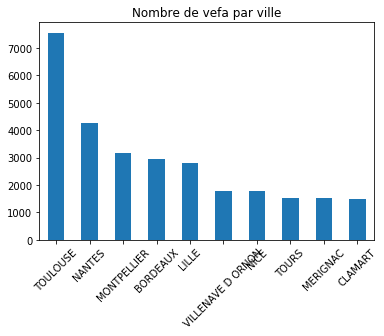

In [162]:
se_vefa_commune = df_vefa.commune.value_counts()
ax = se_vefa_commune.head(10).plot.bar(x='Commune', rot=45)
ax.set_title('Nombre de vefa par ville')

La ville de Toulouse est aussi la ville qui a enregistré le plus grand nombre de Vefa en 2018. Suivi par la ville de Nantes (2éme dans le classement des Ventes). Nice, 3éme dans le classement des ventes, reste dans le top 10 des villes avec le plus de Vefa.

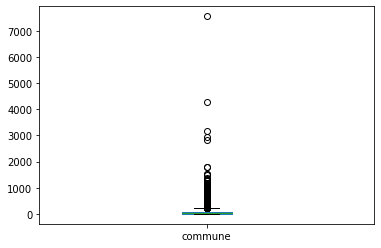

In [163]:
se_vefa_commune.plot.box()

##### Etude des ventes de terrain à bâtir

In [166]:
df_vtb = df[df['nature_mutation']=='Vente terrain à bâtir'].sort_values(by='valeur_fonciere', ascending=False)
df_vtb.head(3)

,no_disposition,date_mutation,nature_mutation,valeur_fonciere,no_voie,b/t/q,type_de_voie,code_voie,voie,code_postal,commune,code_departement,code_commune,prefixe_de_section,section,no_plan,no_volume,1er_lot,surface_carrez_du_1er_lot,2eme_lot,surface_carrez_du_2eme_lot,3eme_lot,surface_carrez_du_3eme_lot,4eme_lot,surface_carrez_du_4eme_lot,5eme_lot,surface_carrez_du_5eme_lot,nombre_de_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,nature_culture,nature_culture_speciale,surface_terrain,month,sign_month,dayofweek
326512,1,2018-04-18,Vente terrain à bâtir,32760000.0,9259.0,NaN,LOT,A564,LA FEUILLANE,13270.0,FOS-SUR-MER,13,39,NaN,AH,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4.0,Local industriel. commercial ou assimilé,42753.0,0.0,S,NaN,110057.0,4,1,2
1148782,1,2018-12-21,Vente terrain à bâtir,22070696.0,12.0,NaN,RUE,3610,NATIONALE,37000.0,TOURS,37,261,NaN,DY,222,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,9,4
1148783,1,2018-12-21,Vente terrain à bâtir,22070696.0,NaN,NaN,PL,0210,ANATOLE FRANCE,37000.0,TOURS,37,261,NaN,DZ,18,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,9,4


La vente de terrain la plus chère a été réalisé à la Fos-Sur-Mer pour un montant de 32.760.000€ pour une surface de terrain à bâtir de 42.753 m2

Text(0.5, 1.0, 'Nombre de vtb par ville')

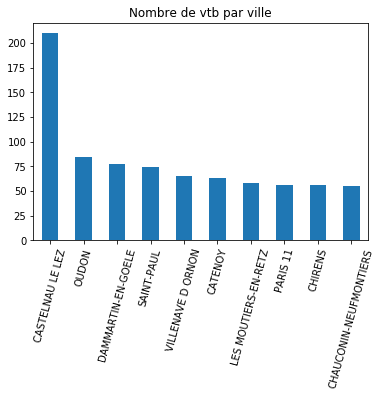

In [170]:
se_vtb_commune = df_vtb.commune.value_counts()
ax = se_vtb_commune.head(10).plot.bar(x='Commune', rot=75)
ax.set_title('Nombre de vtb par ville')

La ville des Castelnau-le-lez enregistre le plus grand nombre de vente de terrain à bâtir.

In [ ]:
df.select_dtypes(exclude=['object']).describe()

In [ ]:
# Suppression des lignes où il n'y a pas de 'valeurs foncières'
indexNames = df[df.valeur_fonciere.isnull()].index
df.drop(indexNames, inplace=True)

### Supprime les données aberrantes

In [ ]:
def outliers(df, min_qtl, max_qtl):
    q_inf = df.valeur_fonciere.quantile(min_qtl)
    q_sup = df.valeur_fonciere.quantile(max_qtl)
    df_no_out = df[(df.valeur_fonciere>q_inf) &
                  (df.valeur_fonciere<q_sup)
                  ]
    return df_no_out

##### Découpe les données entre 'Appartement' et 'Maison'

In [ ]:
# Maison
maison_df = df[df.code_type_local==1]
print('Nb de maison: {}'.format(len(maison_df)))
# Appartement
appart_df = df[df.code_type_local==2]
print('Nb d\'appartement: {}'.format(len(appart_df)))

####  Recherche de données aberrantes

In [ ]:
# Suppression des valeurs foncières avec un quantile inférieur à 5% et supérieur à 95%
appart_no_out = outliers(appart_df,.05,.95)
print('Appartement:\n{}'.format(appart_no_out.valeur_fonciere.describe().apply(lambda x: format(x, 'f'))))

maison_no_out = outliers(maison_df,.05,.95)
print('\nMaison:\n{}'.format(maison_no_out.valeur_fonciere.describe().apply(lambda x: format(x, 'f'))))

On a gardé les quantiles entre 5% et 95% pour éviter les données aberrantes (ex.: un appartement à 1 Milliard)

In [ ]:
plt.figure(figsize=(10,10))
plt.boxplot([appart_no_out.valeur_fonciere, maison_no_out.valeur_fonciere])
plt.ylabel('Valeurs foncières')
plt.xticks([1,2],['Appartement','Maison'])
plt.show();

#### Calcul du prix au m2

Pour continuer la recherche de données aberrantes sur le prix et la surface, on créé un nouvel attribut du prix au mètre carré.

In [ ]:
appart_no_out['total_m2'] = np.maximum((appart_no_out.surface_carrez_du_1er_lot.fillna(0) + \
    appart_no_out.surface_carrez_du_2eme_lot.fillna(0) + \
    appart_no_out.surface_carrez_du_3eme_lot.fillna(0) + \
    appart_no_out.surface_carrez_du_4eme_lot.fillna(0) + \
    appart_no_out.surface_carrez_du_5eme_lot.fillna(0)),appart_no_out.surface_reelle_bati)

appart_no_out = appart_no_out[appart_no_out.total_m2>0]
appart_no_out['prix_m2'] = round(appart_no_out.valeur_fonciere/appart_no_out.total_m2,2)

In [ ]:
appart_no_out.prix_m2.describe().apply(lambda x: format(x, 'f'))

On voit qu'il y a un appartement avec un prix à 690.000€ le m2 qui est de toute évidence une donnée aberrante.
Donc on garde les quantiles entre 5% et 95%

In [ ]:
q_inf = appart_no_out.prix_m2.quantile(.05)
q_sup = appart_no_out.prix_m2.quantile(.95)
appart_no_out = appart_no_out[(appart_no_out.prix_m2>q_inf) & (appart_no_out.prix_m2<q_sup) ]
print('Appartement:\n{}'.format(appart_no_out.prix_m2.describe().apply(lambda x: format(x, 'f'))))

Maintenant le prix au m2 maximum est de 10759€. Le minimum est de 1041€. Nous n'avons pas gardé des valeurs plus extrêmes car nous avons peu de biens pour en déduire un prix.

In [ ]:
plt.figure(figsize=(10,10))
plt.boxplot(appart_no_out.prix_m2)
plt.ylabel('Prix m2')
plt.show();

#### Nombre de pièces principales

Suppression des biens avec des nombres de pièces hors-norme (ex:63)

In [ ]:
#q_inf = appart_no_out.nombre_pieces_principales.quantile(.05)
q_sup = appart_no_out.nombre_pieces_principales.quantile(.999)
appart_no_out = appart_no_out[appart_no_out.nombre_pieces_principales<q_sup]
print('Appartement:\n{}'.format(appart_no_out.nombre_pieces_principales.describe().apply(lambda x: format(x, 'f'))))

In [ ]:
plt.figure(figsize=(10,10))
plt.boxplot(appart_no_out.nombre_pieces_principales)
plt.ylabel('Nombre de pièces principales')
plt.show();

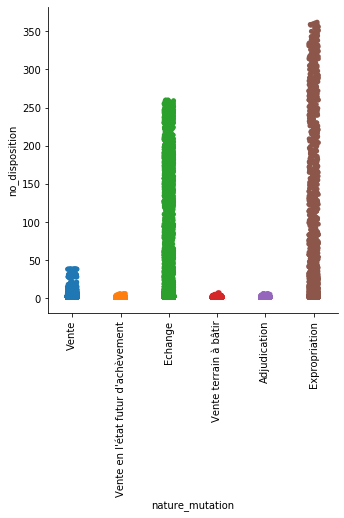

In [59]:
ax = sns.catplot(x="nature_mutation", y="no_disposition", data=df);
ax.set_xticklabels(rotation=90)